In [1]:
#Importaremos los módulos necesarios
%matplotlib inline
import numpy as np
import upv_audio
import matplotlib
import matplotlib.pyplot as plt
import math
matplotlib.rcParams['figure.figsize'] = (15.0, 7.5)
from IPython.display import Audio

# Análisis de señales a bloques
En un módulo anterior hemos visto cómo podíamos extraer ciertos parámetros globales de una señal:

* Media

* Potencia

* Mínimo y máximo

En algunas ocasiones interesa no realizar el análisis sobre la totalidad de la señal sino en bloques o fragmentos de duración más limitada. Ejemplos de situaciones en los que interesa hacerlo así son:

* Cuando se analizan señales en tiempo real y no se desea esperar hasta el infinito a comenzar a realizar el análisis

* Cuando la señal es de tal duración que no se puede almacenar en memoria.

* Cuando se tienen señales *no estacionarias* en los que un parámetro como la media o la varianza tienen poco sentido a escala global por ser cantidades que varían localmente.

En este módulo veremos cómo realizar el análisis con **bloques NO solapados**. Más adelante se verá como analizar bloques con solape o incluso bloques que avanzan de manera continua.

Lo que es importante que quede claro es que hay dos aspectos independientes a considerar:

1. Cómo ir obteniendo los bloques.

2. El tipo de análisis a realizar.

In [2]:
# Consideremos una señal de 15 muestras 
x=np.arange(13)
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [3]:
#Función que trocea la señal en bloques SIN SOLAPE y va imprimiendo las muestras de cada bloque
def bloques(x,blcksize):
    '''
    x: array unidimensional de numpy
    Descompone una señal x en bloques de tamaño blcksize
    Todos los bloques tienen el mismo tamaño
    Si hay un "pico" de muestras, por ejemplo si hay 13 muestras y blcksize=2 debe sacar 2 bloques de 5 muestras y se descartan las 3 últimas

    Devuelve una lista de bloques
    Cada bloque es un array de numpy
    '''
    bloques=[]
    ###  BEGIN SOLUTION
    # Este lo hacemos en clase
    lx=len(x)
    n1=0
    n2=n1+blcksize
    block_counter=0

    while n2 <= len(x):
        bloque=x[n1:n2]
        bloques.append(bloque)
        print('block:', block_counter,' Muestras:',bloque)
        n1+=blcksize
        n2+=blcksize
        block_counter +=1
    ### END SOLUTION
    return bloques # Numero de bloques

In [4]:
# Comprobación del funcionamiento
# Ejecutar y comprobar que funcina correctamente
blcksize=5
print('blcksize=', blcksize)
bls=bloques(x,blcksize)

print("========================")
blcksize=4
print('blcksize=', blcksize)
bls=bloques(x,blcksize)


print("========================")
blcksize=3
print('blcksize=', blcksize)
bls=bloques(x,blcksize)

blcksize= 5
block: 0  Muestras: [0 1 2 3 4]
block: 1  Muestras: [5 6 7 8 9]
blcksize= 4
block: 0  Muestras: [0 1 2 3]
block: 1  Muestras: [4 5 6 7]
block: 2  Muestras: [ 8  9 10 11]
blcksize= 3
block: 0  Muestras: [0 1 2]
block: 1  Muestras: [3 4 5]
block: 2  Muestras: [6 7 8]
block: 3  Muestras: [ 9 10 11]


In [5]:
# Celda para corrección automática

### BEGIN HIDDEN TESTS
#Estos tests son solo para ver si lo han hecho
x1=np.arange(19)
x2=np.arange(128)
### AUTOTEST bloques(x1,5)
### AUTOTEST bloques(x1,7)
### AUTOTEST bloques(x2,32)
### AUTOTEST bloques(x2,23)

### END HIDDEN TESTS

* Vemos que las últimas muestras que no dan para formar un bloque no se han considerado

* Eso no es importante normalmente en sistemas que funcionan de modo continuo.

* Si se quisieran considerar hay que tomar una decisión (aquí simplemente pasamos del último bloque) sobre qué hacer en el último bloque:

    * Suponer que la señal está seguida por ceros
    
    * Suponer que la última muestra se repite tantas veces como sea necesario.
    
    * Que el último bloque tiene un cierto solape con el anterior
    
    * ...

_______________
## Ejercicio evaluable a realizar individualmente

* Modificar el código anterior, para que todas las muestras de la señal  intervengan.
* En el último bloque se añaden añaden los ceros que sean necesarios para que tenga el mismo tamaño que el resto.

Así por ejemplo, si señal es \[1,2,3,4,5,6,7\] y blcksize=3, los bloques serían:

* \[1,2,3\]
* \[4,5,6\]
* \[7,0,0\]
____________

In [6]:
def bloques2(x,blcksize):
    '''
    x: array unidimensional de numpy
    Devuelve una lista con los bloques
    Cada bloque es un array de numpy
    Todos los bloques del mismo tamaño
    Si en el ultimo bloque faltan muestras se añaden ceros (ver texto)
    '''
    bloques=[]
    ###  BEGIN SOLUTION
    # Este lo hacen ellos en clase y lo tienen que entregar al final de la clase. Tiena más valor
    lx=len(x)
    n1=0
    n2=n1+blcksize
    block_counter=0

    while n2 <= lx:
        bloque=x[n1:n2]
        bloques.append(bloque)
        print('block:', block_counter,' Muestras:',bloque)
        n1+=blcksize
        n2+=blcksize
        block_counter +=1
    if n1 < lx:
        bloque = np.zeros(blcksize)
        bloque[0:lx-n1]=x[n1:]
        print('block:', block_counter,' Muestras:',bloque)
        bloques.append(bloque)
    ### END SOLUTION
    return bloques # Numero de bloques

In [7]:
# Comprobación del funcionamiento
# Ejecutar y comprobar que funciona correctamente antes de enviar el cuaderno

x=np.arange(18)
print("x=",x)
blcksize=5
print('blcksize=', blcksize)
bls=bloques2(x,blcksize)

print("========================")
blcksize=4
print('blcksize=', blcksize)
bls=bloques2(x,blcksize)


print("========================")
blcksize=3
print('blcksize=', blcksize)
bls=bloques2(x,blcksize)

x= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
blcksize= 5
block: 0  Muestras: [0 1 2 3 4]
block: 1  Muestras: [5 6 7 8 9]
block: 2  Muestras: [10 11 12 13 14]
block: 3  Muestras: [15. 16. 17.  0.  0.]
blcksize= 4
block: 0  Muestras: [0 1 2 3]
block: 1  Muestras: [4 5 6 7]
block: 2  Muestras: [ 8  9 10 11]
block: 3  Muestras: [12 13 14 15]
block: 4  Muestras: [16. 17.  0.  0.]
blcksize= 3
block: 0  Muestras: [0 1 2]
block: 1  Muestras: [3 4 5]
block: 2  Muestras: [6 7 8]
block: 3  Muestras: [ 9 10 11]
block: 4  Muestras: [12 13 14]
block: 5  Muestras: [15 16 17]


In [8]:
# Celda para corrección automática bloques2

### BEGIN HIDDEN TESTS
#Estos tests son solo para ver si lo han hecho
x1=np.arange(19)
x2=np.arange(128)
### AUTOTEST bloques2(x1,5)
### AUTOTEST bloques2(x1,7)
### AUTOTEST bloques2(x2,32)
### AUTOTEST bloques2(x2,23)

### END HIDDEN TESTS

## Características de señales por bloques.

Una vez visto cómo:

* Descomponer la señal en bloques (visto más arriba)

* Calcular características de una señal: media, potencia media, valor de pico,...

Podemos calcular las dos ideas para **calcular una característica *bloque a bloque***


In [9]:

def potBloques(x,blcksize):
    '''
    x: array de numpy con muestras
    blcksize: tamaño del bloque en muestras

    Coge bloques todos de tamaño blcksize despreciendo el "pico" de muestras
    Devuelve un array de numpy con las potencias de cada uno de los bloques.
    '''

    potencias=[]
    ###  BEGIN SOLUTION
    # Este se lo hacemos en clase y luego comprobamos que lo han hecho
    
    n1=0
    n2=n1+blcksize
    block_counter=0
    while n2 < len(x):
        muestras=x[n1:n2];
        media=np.mean(muestras)
        pot=np.mean(muestras**2)
        potencias.append(pot)
        # print('block:', block_counter,' Muestras:',muestras,' Media-bloque:',media,
        #      'Pot-bloque',pot)
        n1+=blcksize
        n2+=blcksize
        block_counter +=1
    ###  END SOLUTION
    potencias=np.array(potencias)
    return potencias

In [10]:
# Comprobación del funcionamiento
x=np.arange(15)
blcksize=4
potencias=potBloques(x,4)
print("potencias= ",potencias)


potencias=  [ 3.5 31.5 91.5]


In [11]:
# Celda de evaluación automática del ejercicio potBloques()
# Celda para corrección automática

### BEGIN HIDDEN TESTS
#Estos tests son solo para ver si lo han hecho
x1=np.arange(19)
x2=np.arange(128)
### AUTOTEST potBloques(x1,5)
### AUTOTEST potBloques(x1,7)
### AUTOTEST potBloques(x2,32)
### AUTOTEST potBloques(x2,23)

### END HIDDEN TESTS

______________________________________

## Aplicación: Segmentación de voz
Vamos a ver cómo aplicar lo anterior a la segmentación de voz.

La idea es partiendo de una grabación de voz, extraer los fragmentos donde hay voz uno por uno, e ignorar los silencios intermedios.

El procedimiento tendrá los siguientes pasos:

* vamos a ir analizando la señal en bloques de **100 ms**.
* calcularemos la varianza en cada bloque. Supondremos que cuando hay voz habrá más potencia, y que cuando no haya voz, habrá un cierto nivel de ruido entre las palabras.
* Tomaremos como nivel de ruido de fondo la menor potencia de bloque.
* Como la potencia de cada bloque no deja de ser una estima, en los bloques de solo ruido habrá pequeñas variaciones de potencia. Asumiremos un margen *M* (dB) de seguridad.
* Diremos que un bloque es de voz si supera la potencia mínima de bloque más el margen de seguridad.
* Para evitar que algún pulso de ruido me genere falsas alarmas, descartaré todos aquellos intervalos marcados como voz que no tengan una duración mínima de 300 ms.

Manos a la obra...

### Cálculo de la potencia media por bloques

44100 (702938,)


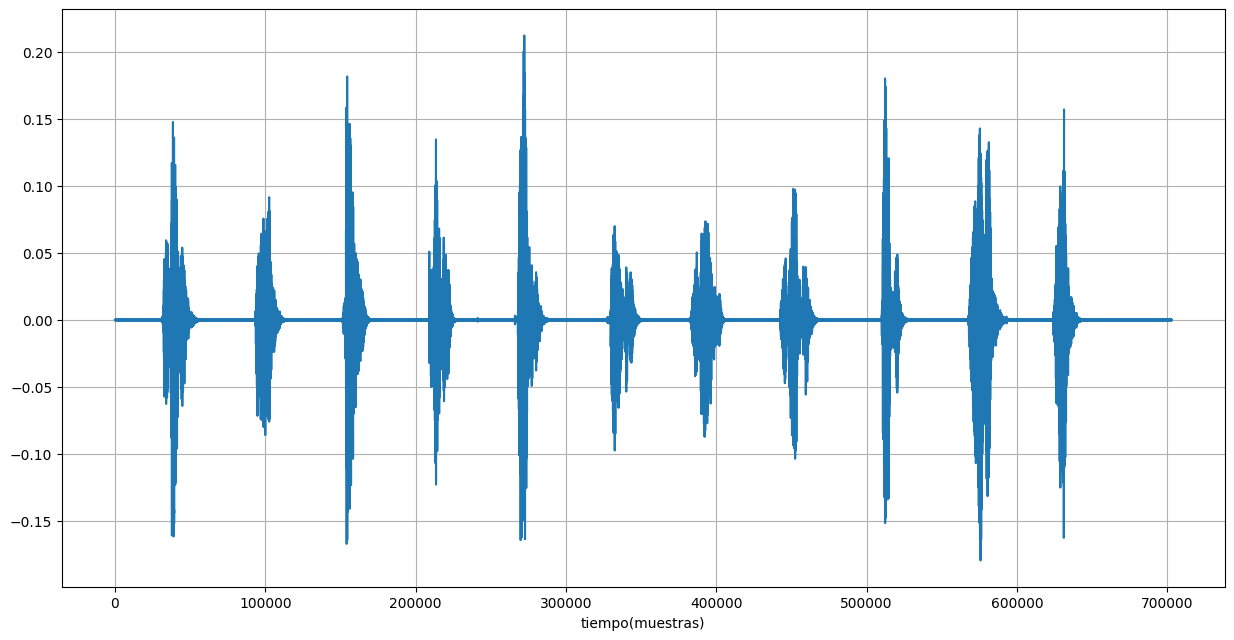

In [12]:
# Comenzaremos cargando una señal de audio:
fs,x=upv_audio.read('audios/numeros.wav')
print(fs,x.shape)
_=plt.plot(x)
_=plt.xlabel('tiempo(muestras)')
_=plt.grid()

In [13]:
#Calculamos el tamaño del bloque en muestras:
blcksize=int(fs*100e-3)
print('blcksize=', blcksize)

blcksize= 4410


blcksize= 4410


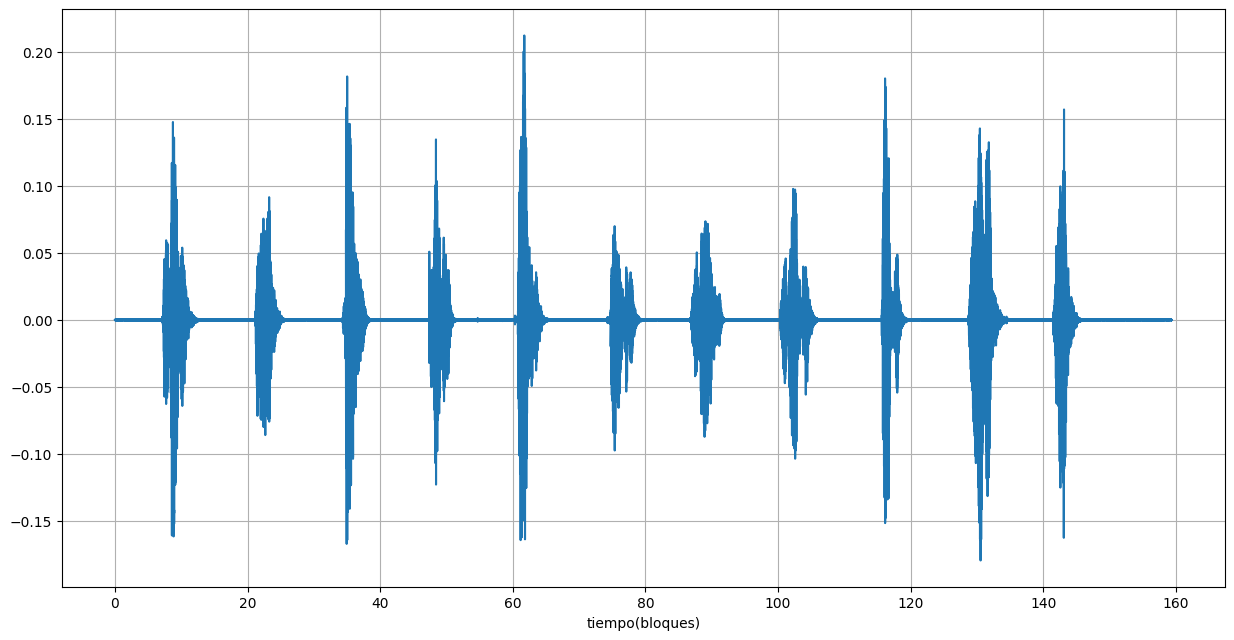

In [14]:
# Representemos el tiempo en bloques
print('blcksize=', blcksize)
b=np.arange(x.shape[0])
b=b/blcksize
_=plt.plot(b,x)
_=plt.xlabel('tiempo(bloques)')
_=plt.grid()

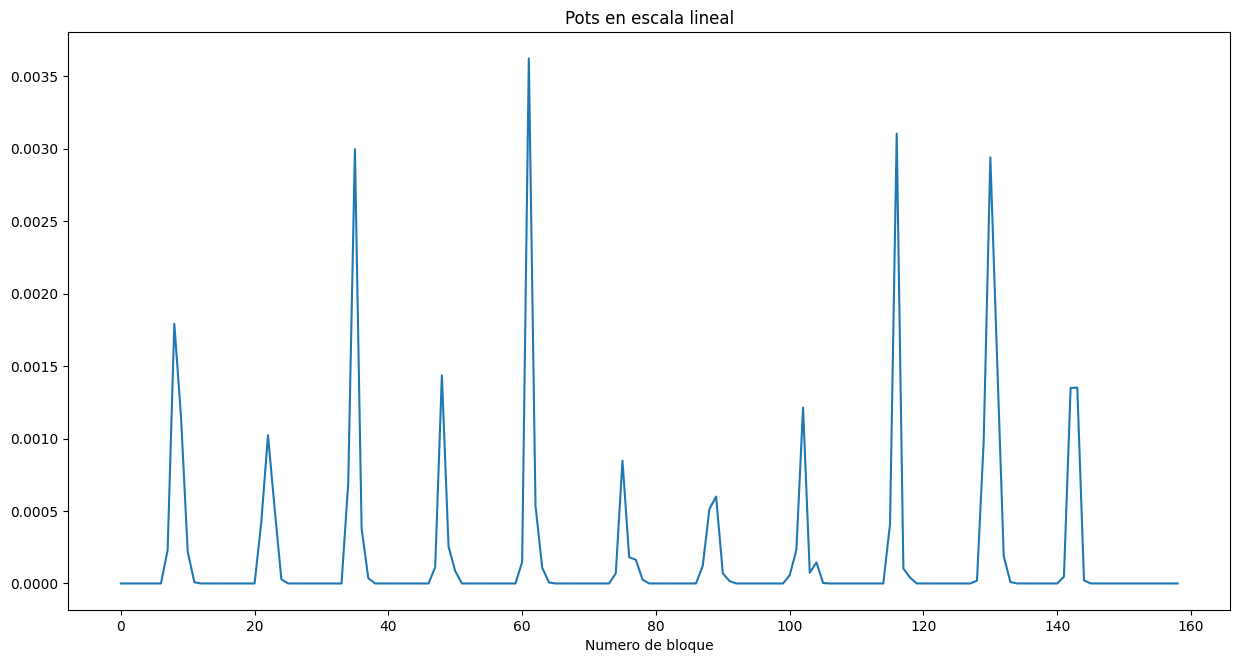

In [15]:
pots=potBloques(x,blcksize)
_=plt.plot(pots)
_=plt.title('Pots en escala lineal')
_=plt.xlabel('Numero de bloque')

Vemos que se observan bien las palabras. Sin embargo como el nivel de ruido de fondo es pequeño, es dificil saber si el umbral me partiría alguna palabra. Visualicemos la potencia en dB

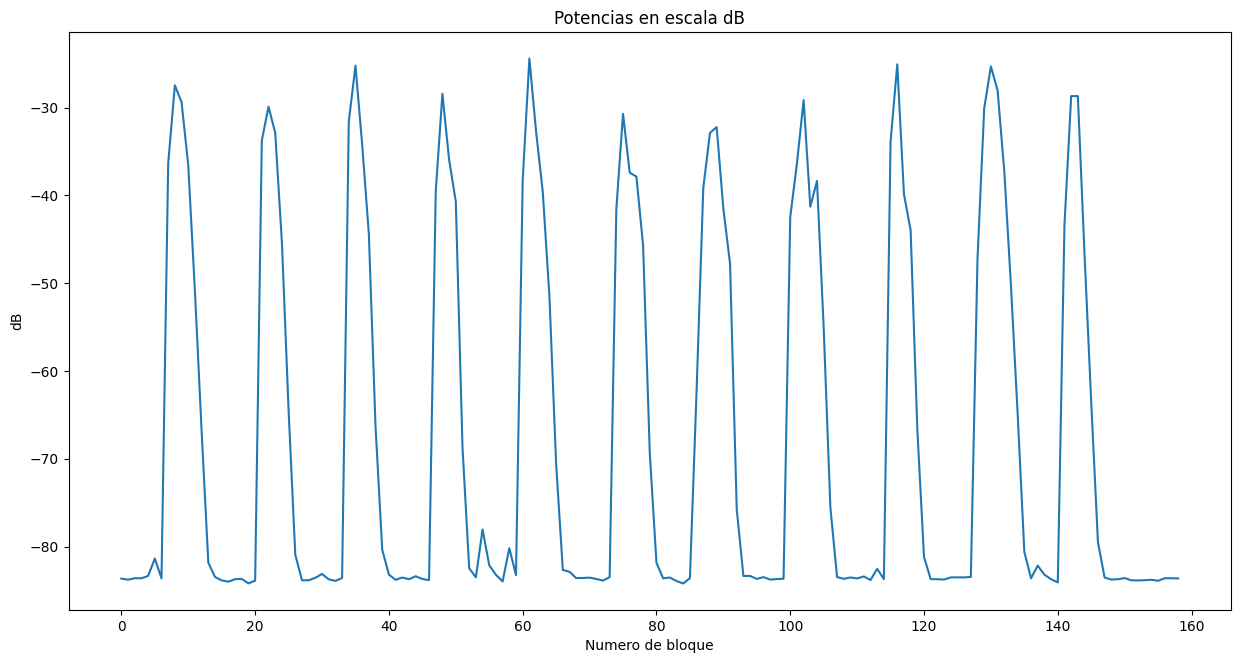

In [16]:
_=plt.plot(10*np.log10(pots))
_=plt.title('Potencias en escala dB')
_=plt.xlabel('Numero de bloque')
_=plt.ylabel('dB')

Ahora sí se ve bien!!! Vemos que sobre el bloque 90 hay un par de picos de ruido!!
No importa. Si nos sale una palabra muy corta la eliminaremos!!

Fijaremos el umbral 6 dB por encima del ruido de fondo. 

Haremos una función que reciba como entrada las potencias de los bloques y el margen en dB y que genere para cada bloque 0/1 dependiendo de si es voz o fondo.


In [17]:
def vozFondo(potencias, umbraldB):
    potdB=10*np.log10(potencias)
    return (potdB>umbraldB).astype('int16') # Es importante ponerlo así para que no devuelva booleanos

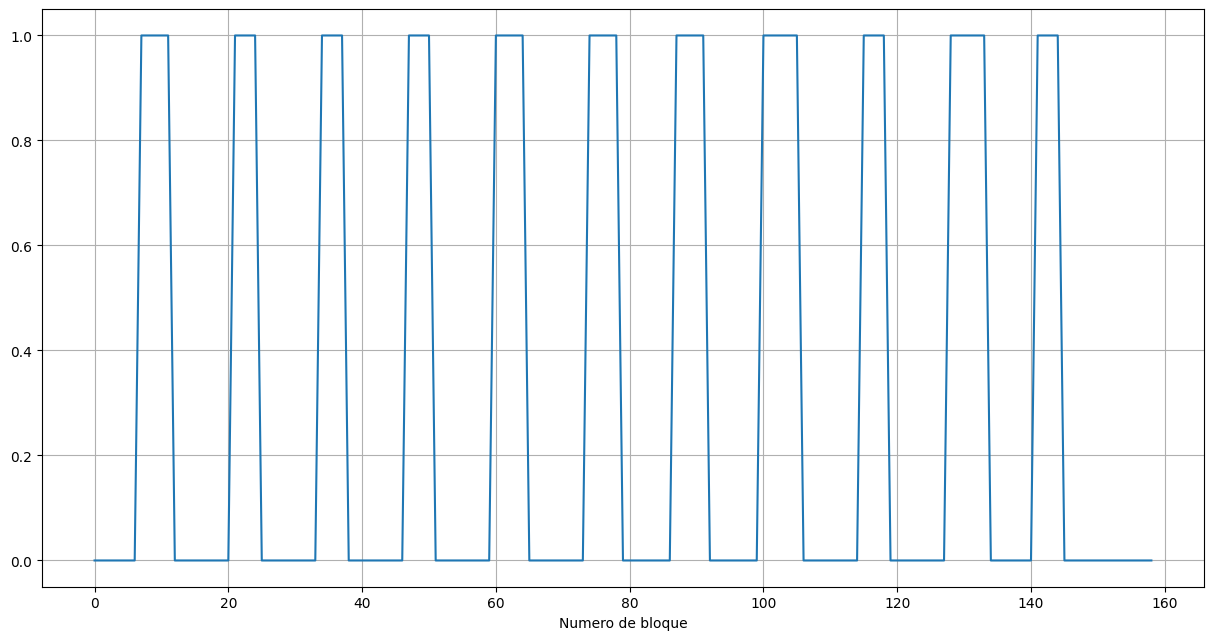

In [18]:
vozbinaria = vozFondo(pots,-60)
_=plt.plot(vozbinaria)
_=plt.grid()
_=plt.xlabel('Numero de bloque')

Finalmente haremos una función que recibiendo la anterior señal cuadrada haga lo siguiente:
* Determinar el rango de muestras de cada palabra. 
* Devolverá una lista con tantos nd-arrays como palabras


### Segmentación
Debemos encontrar una manera de determinar donde empieza y termina cada bloque. Fijaremos las ideas, como en otras ocasiones con un ejemplo pequeño antes de pasar al problema real

In [19]:
# Sopongamos una pequeña señal binaria

b=np.array([0,0,0,1,1,1,0,0,0])
print(b)

[0 0 0 1 1 1 0 0 0]


In [20]:
# Lo que intento es encontrar n1, y n2 tales que cuando haga range(n1,n2) me devuelva los índices donde la señal 
# es 1
# En este caso la respuesta debería ser n1=3 y n2=6.
# se recuerda que en range(n1,n2) n1 es inclusive y n2 exclusive
print(list(range(3,6)))

[3, 4, 5]


In [21]:
# La idea es calcular diff y detectar el comienzo como un punto donde diff es 1, y el  final como un punto donde 
# diff es -1
dd=np.diff(b)
print(dd)

[ 0  0  1  0  0 -1  0  0]


Observemos que:

* el valor del +1 está en la posición "2", por lo que para obtener n1 deberíamos sumarle 1 a la posición donde está el "1" en dd.

* El valor "-1" de dd, que marca el final se encuentra en la posición "5", por lo que de nuevo observamos que debemos sumar 1 a la posición del "-1" en dd para obtener el valor n2.

In [22]:
n1=1+np.argwhere(dd==1)
n2=1+np.argwhere(dd==-1)
print('n1=',n1)
print('n2=',n2)
n1=np.squeeze(n1)
n2=np.squeeze(n2)

print(' Tras squeeze n1=',n1)
print('Tras squeeze n2=',n2)

print(list(range(n1.item(),n2.item())))
#n1.item() convierte de array de shape (1,) a escalar.

n1= [[3]]
n2= [[6]]
 Tras squeeze n1= 3
Tras squeeze n2= 6
[3, 4, 5]


Que es exactamente lo que andabamos buscando.

Si tuvieramos más de un pulso n1, y n2 serían vectores que tendrían tantos elementos como pulsos hubiera.

_______________________________________________________________________________

### *zip* para crear listas de tuplas

Supongamos que tenemos una señal binaria que tiene 2 segmentos:

In [23]:
x=np.zeros(16)
x[2:5]=1
x[9:13]=1
print(x)

[0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]


In [24]:
dd=np.diff(x)
comienzos=np.squeeze(np.argwhere(dd>0)) + 1# IMPORTANTE: squeeze es para pasar de (p,1) a (p,)
finales=np.squeeze(np.argwhere(dd<0)) + 1

print("dd=",dd)
print("comienzos = ",comienzos)
print(" finales = ", finales)
for pareja in zip(comienzos, finales):
    print("  * comienzo-fin:",pareja)

dd= [ 0.  1.  0.  0. -1.  0.  0.  0.  1.  0.  0.  0. -1.  0.  0.]
comienzos =  [2 9]
 finales =  [ 5 13]
  * comienzo-fin: (2, 5)
  * comienzo-fin: (9, 13)


### Dado un número de bloque determinar el principio y el final

Para trocear una señal necesitaremos conocer:

* El número de bloque inicial (inclusive)
* El número de bloque final (exclusive)

A partir del número de bloque es necesario conocer la primera muestra (inclusive) de un bloque


In [25]:
nbloque_inicio = 3
blcksize= 5
primera_muestra = nbloque_inicio * blcksize
print("primera muestra: ", primera_muestra)

primera muestra:  15


Para determinar la muestra final (exclusive), hay que pensar que dicho valor coincide con la primera muestra del bloque siguiente.

In [26]:
nbloque_fin=6 # Este valor es el número del último bloque exclusive. Es decir el último bloque válido es el 5
blcksize= 5
ultima_muestra = nbloque_fin * blcksize
print ("ultima muestra: ", ultima_muestra)

ultima muestra:  30


**OBSERVACIÓN**

* En el ejemplo anterior, los bloques que nos interesan son el 3, 4 y 5, es decir en total 3 bloques.

* Recordemos que el bloque de final (6) es *exclusive*.

* 3 bloques son 3 x 5 = 15 muestras

* Observemos que la cantidad de muestras entre ultima_muestra - primera_muestra = 15 **¡Coinciden!**

_________________________

### Crear funcion segmentaPalabras

Una función que recibe:
* x : vector de muestras de señal mono
* blcksize: tamaño del bloque de análisis de potencia \[muestras\]
* umbraldB: potencia mínima en dBs que debe tener un bloque para que se considere voz

Debe devolver:
* Una lista de *palabras*
* Cada *palabra* es un array de numpy con las muestras correspondientes


In [33]:
def segmentaPalabras(x,blcksize,umbraldB):
    '''
    x: señal mono
    blcksize: tam bloque
    umbraldB: umbral de potencia en dBs

    Devuelve:
    lista de arrays de numpy.
      Cada array es una palabra
    '''
    
    pots=potBloques(x,blcksize) # tantas potencias como bloques
    binaria=vozFondo(pots,umbraldB) # tantos 0s y 1s como bloques
    ''' Pasos a completar:
         * Determinar los números de bloque donde comienzan palabras
         * Determinar los números de bloque donde terminan palabras
         * Emparejar comienzos y finales con zip
           * Para cada (comienzo,final) --> obtener la muestra inicial y final del segmento
           * recortar la palabra
           * añadir a la lista "palabras"
    '''
    palabras=[]
    ### BEGIN SOLUTION
    dd=np.diff(binaria)  
    inicios_segmentos = np.squeeze(np.argwhere(dd>0))+1
    finales_segmentos = np.squeeze(np.argwhere(dd<0))+1
    for ini,fin in zip(inicios_segmentos,finales_segmentos):
        muestra_ini = ini * blcksize
        muestra_fin = fin * blcksize
        palabra = x[muestra_ini:muestra_fin]
        palabras.append(palabra)
    
    ### END SOLUTION

    return palabras



In [28]:
# Comprobación individual del funcionamiento de segmentaPalabras()

# Ejecutamos y comprobamos que
#   * El número de palabras es el correcto
#   * la gráfica corresponde a una palabra
#   * Se oye como una  palabra

# Recargamos la señal por si acaso...
fs,x=upv_audio.read('audios/numeros.wav')
print(fs,x.shape)

# Fijamos los parámetros
bloque_sg=100e-3
blcksize=int(fs*bloque_sg)
umbraldB=-60

# Ejecutamos
palabras=segmentaPalabras(x,blcksize, umbraldB)
print('Hay ', len(palabras), ' palabras y debería haber "11"')

44100 (702938,)
Hay  11  palabras y debería haber "11"


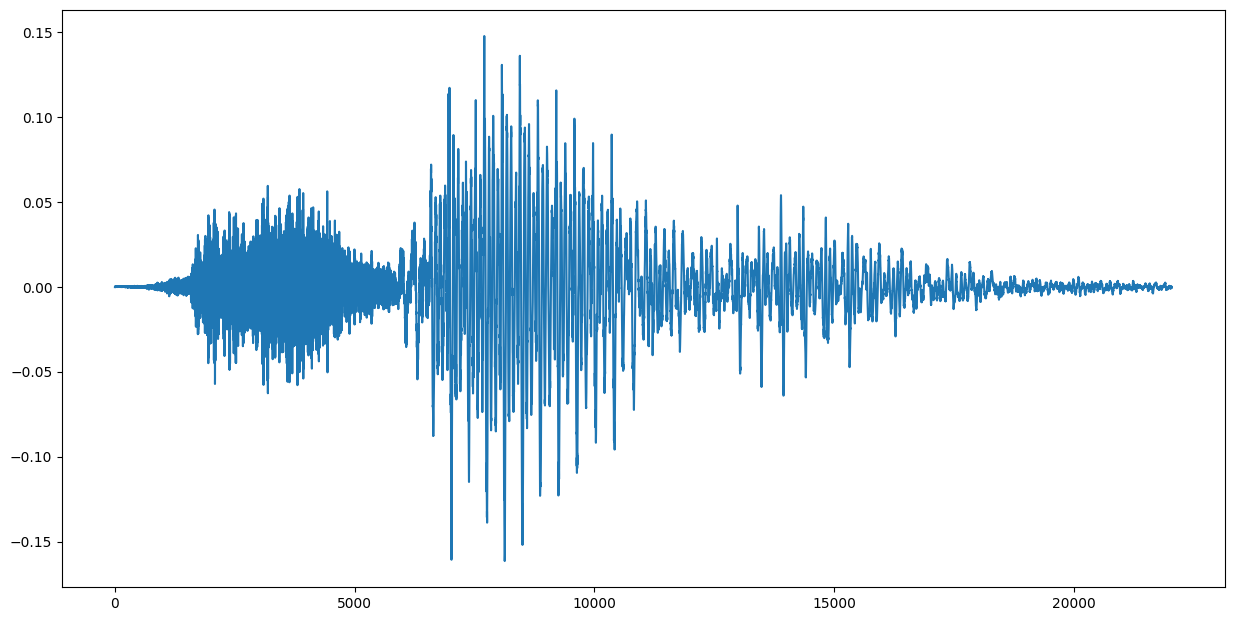

In [29]:
_=plt.plot(palabras[0])
Audio(palabras[0],rate=fs)

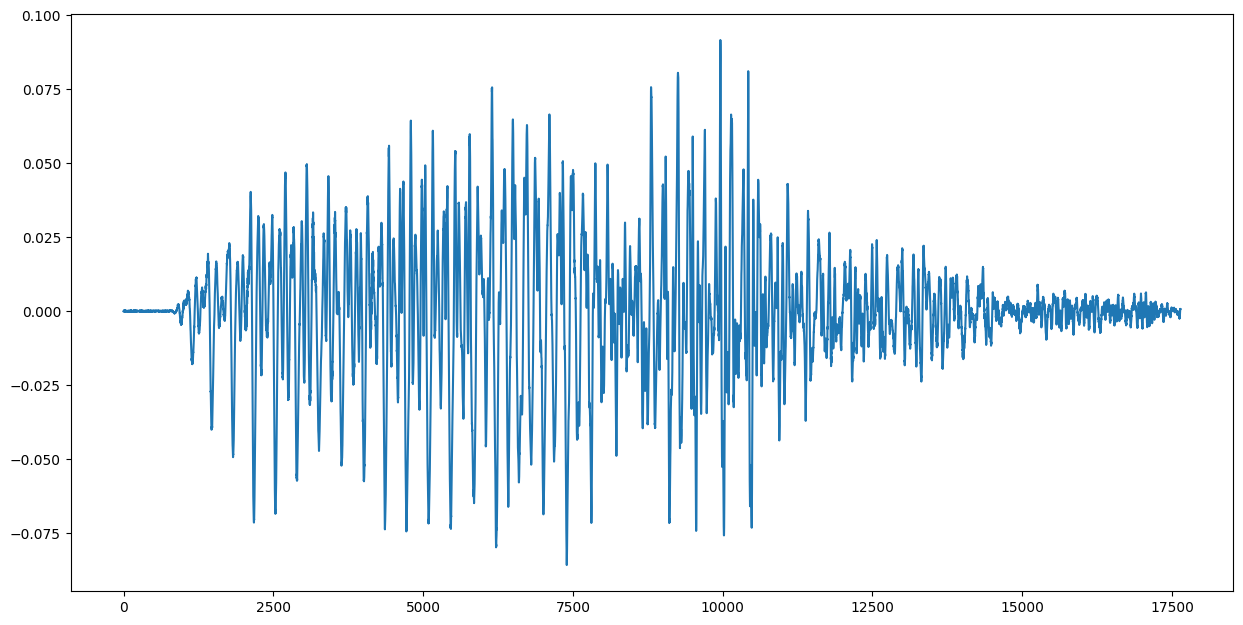

In [30]:
_=plt.plot(palabras[1])
Audio(palabras[1],rate=fs)

In [31]:
# Otra comprobación individual

fs,x=upv_audio.read('audios/numeros.wav')
print(fs,x.shape)

# Fijamos los parámetros
bloque_sg=120e-3
blcksize=int(fs*bloque_sg)
umbraldB=-60

palabras=segmentaPalabras(x[200000:300000],blcksize, umbraldB)
print('200k:300K --> Hay ', len(palabras), ' palabras y debería haber "2"')

palabras=segmentaPalabras(x[300000:500000],blcksize, umbraldB)
print('300K:500K --> Hay ', len(palabras), ' palabras y debería haber "3"')

44100 (702938,)
200k:300K --> Hay  2  palabras y debería haber "2"
300K:500K --> Hay  3  palabras y debería haber "3"


In [32]:
# Celda de auto evaluación
### BEGIN HIDDEN TESTS

fs,x=upv_audio.read('audios/numeros.wav')
print(fs,x.shape)

# Fijamos los parámetros
bloque_sg=120e-3
blcksize=int(fs*bloque_sg)
umbraldB=-50
### AUTOTEST segmentaPalabras(x[300000:500000],blcksize, umbraldB)
### AUTOTEST segmentaPalabras(x,blcksize, umbraldB)
### END HIDDEN TESTS

44100 (702938,)
